In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
sns.set() #setting defualt seaborn style 

In [11]:
df = pd.read_csv("insurance.csv")

In [6]:
import os

In [7]:
os.getcwd()

'C:\\Users\\sweety Gain'

In [10]:
os.chdir('C:\\Users\\sweety Gain\\Downloads')

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
df.head() #cheaking the head of the data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
#cheacking for missing value

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df['sex'].value_counts() #Number of males and feamale in the dataset

male      676
female    662
Name: sex, dtype: int64

In [16]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [17]:
df['age'].value_counts().sort_values() #age distribution

64    22
61    23
62    23
63    23
60    23
39    25
35    25
38    25
36    25
58    25
59    25
37    25
32    26
33    26
55    26
34    26
56    26
57    26
41    27
40    27
31    27
44    27
42    27
30    27
43    27
29    27
49    28
54    28
53    28
21    28
22    28
24    28
25    28
28    28
27    28
23    28
26    28
52    29
48    29
20    29
45    29
46    29
47    29
51    29
50    29
19    68
18    69
Name: age, dtype: int64

In [18]:
#Data Cleaning

In [19]:
#converting categorical to numerical
clean_data = {'sex': {'male' : 0, 'female': 1},
              'smoker' : {'no' : 0, 'yes' :1},
              'region' : {'northwest':0, 'northeast':1 , 'southeast': 2,
                          'southwest':3}
             }

data_copy = df.copy()
data_copy.replace(clean_data,inplace=True)

In [20]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


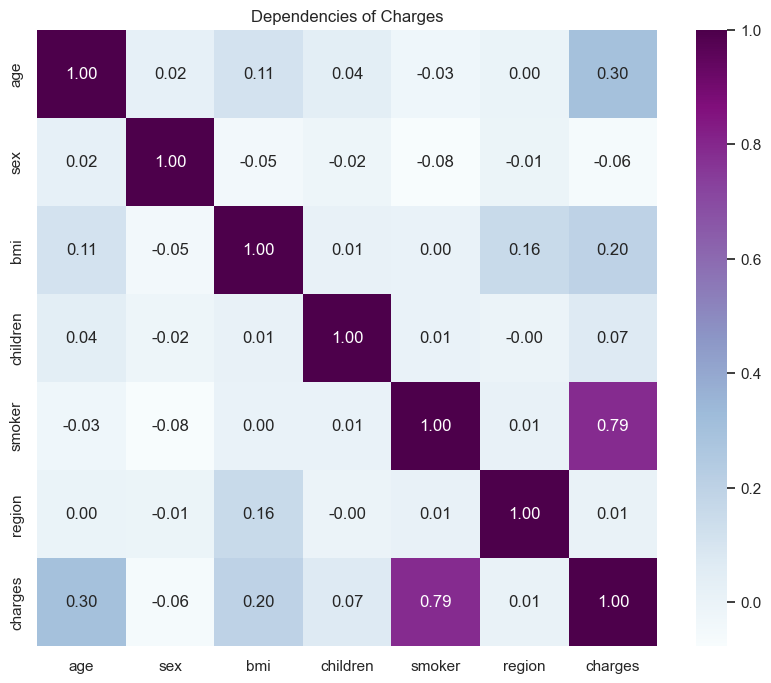

In [21]:
#heatmap
corr  = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu', annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Charges")
plt.show()

In [22]:
print(data_copy['sex'].value_counts().sort_values())
print(data_copy['smoker'].value_counts().sort_values())
print(data_copy['region'].value_counts().sort_values())

1    662
0    676
Name: sex, dtype: int64
1     274
0    1064
Name: smoker, dtype: int64
1    324
3    325
0    325
2    364
Name: region, dtype: int64


Text(0.5, 1.0, 'Distribution of charges')

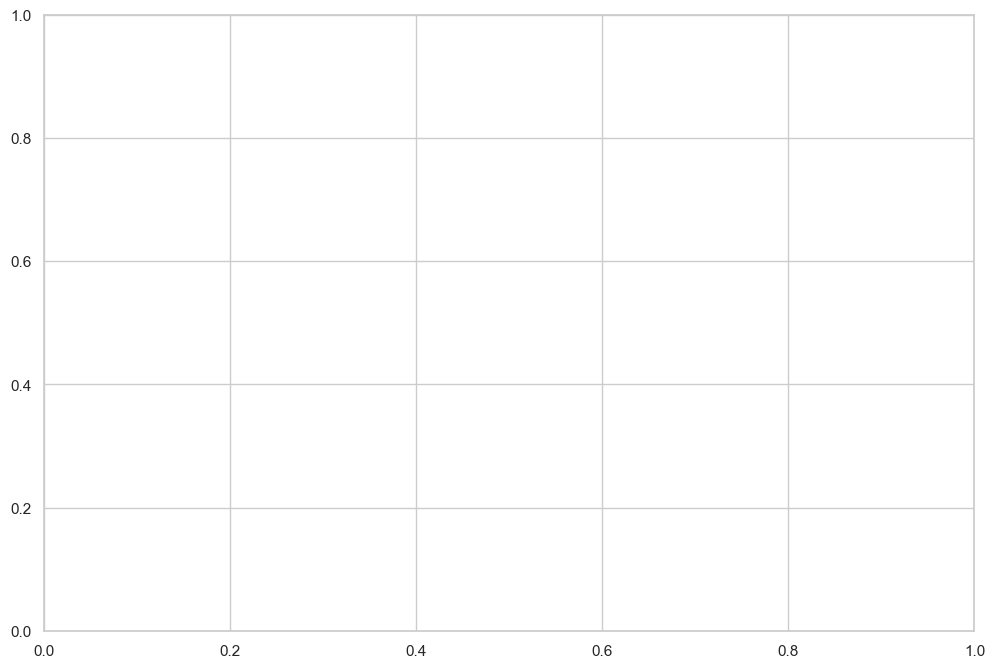

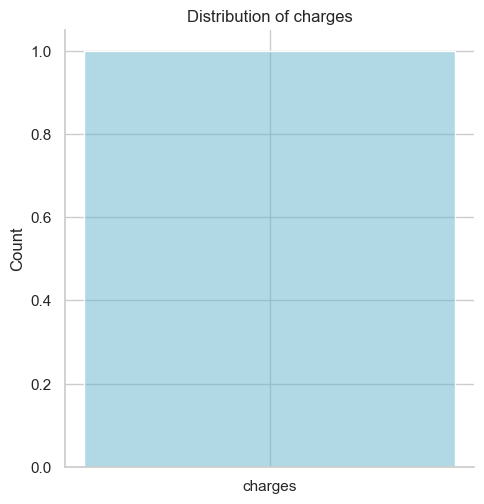

In [23]:
# Now we can proceed with the EDA / first- distribution of charges
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.displot(['charges'], kde = True, color = 'c')
plt.title('Distribution of charges')

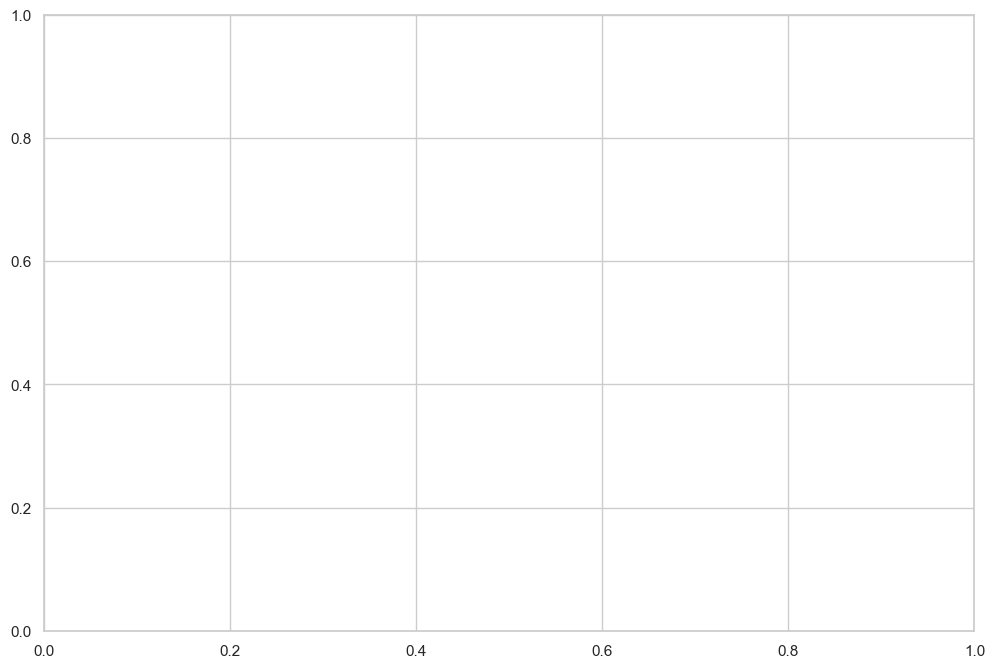

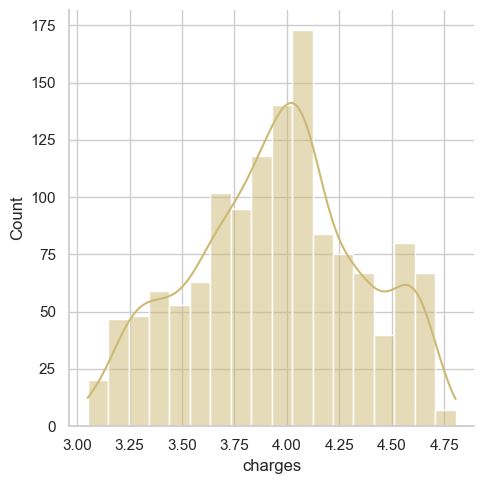

In [24]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.displot(np.log10(df['charges']), kde = True, color= 'y')

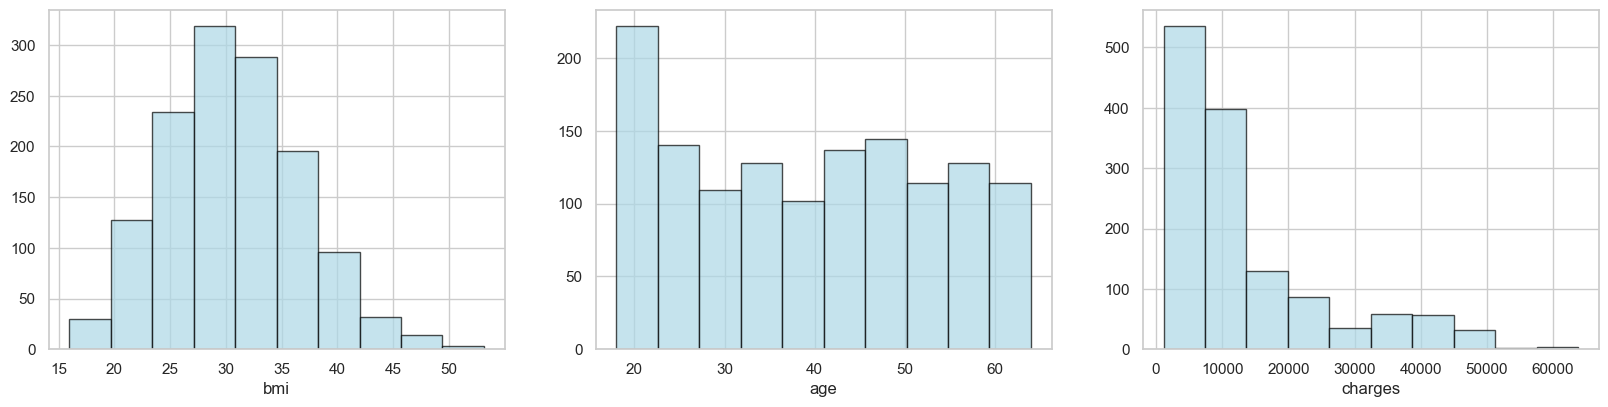

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color ='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color ='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color ='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('charges')
plt.show()

In [26]:
#from the avobe we conclude that bmi is normally distributed,
#age distributed uniformly,and charges highly skewed

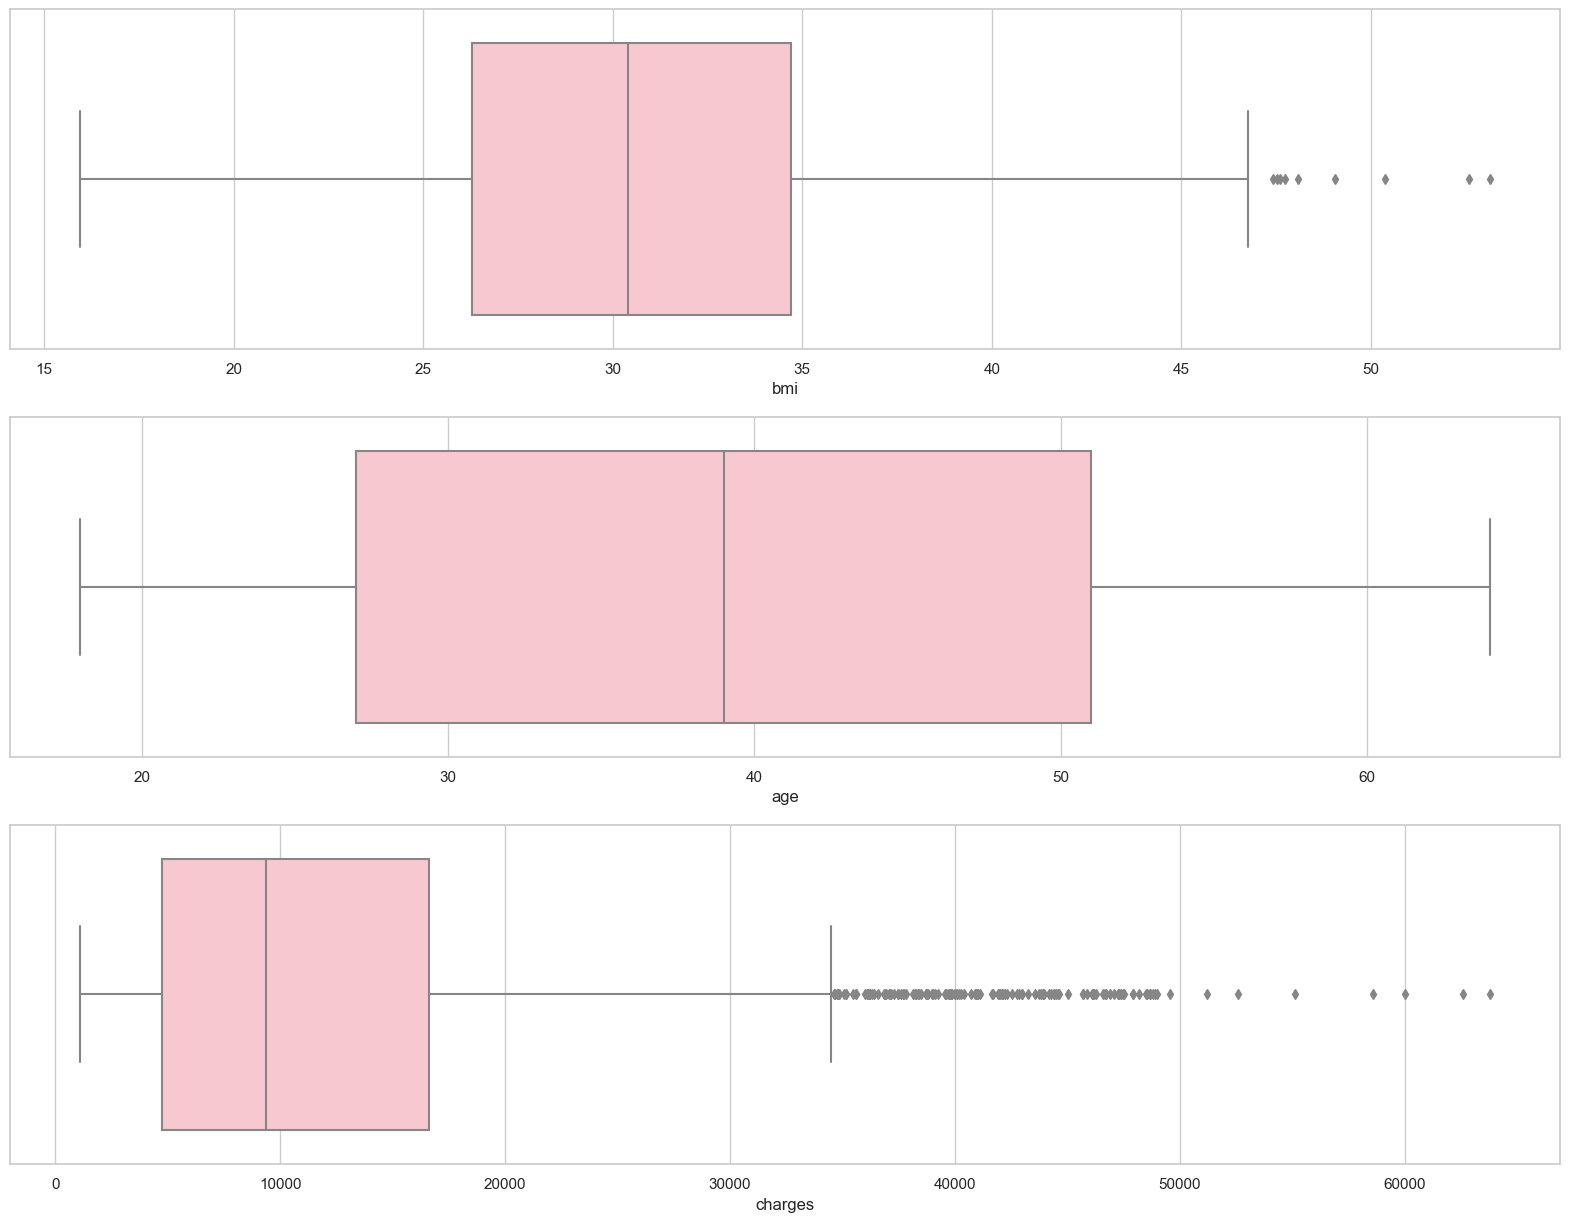

In [27]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.boxplot(x = df.bmi, color ='pink')

plt.subplot(3,1,2)
sns.boxplot(x = df.age, color ='pink')

plt.subplot(3,1,3)
sns.boxplot(x = df.charges, color ='pink')
plt.show()

In [28]:
#charges- as it is skewed it has some extreme values

In [29]:
print('Printing Skewness and kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and kurtosis {2:.3f}'.
    format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and kurtosis for all columns

age : Skewness 0.056 and kurtosis -1.245
sex : Skewness 0.021 and kurtosis -2.003
bmi : Skewness 0.284 and kurtosis -0.051
children : Skewness 0.938 and kurtosis 0.202
smoker : Skewness 1.465 and kurtosis 0.146
region : Skewness -0.038 and kurtosis -1.329
charges : Skewness 1.516 and kurtosis 1.606


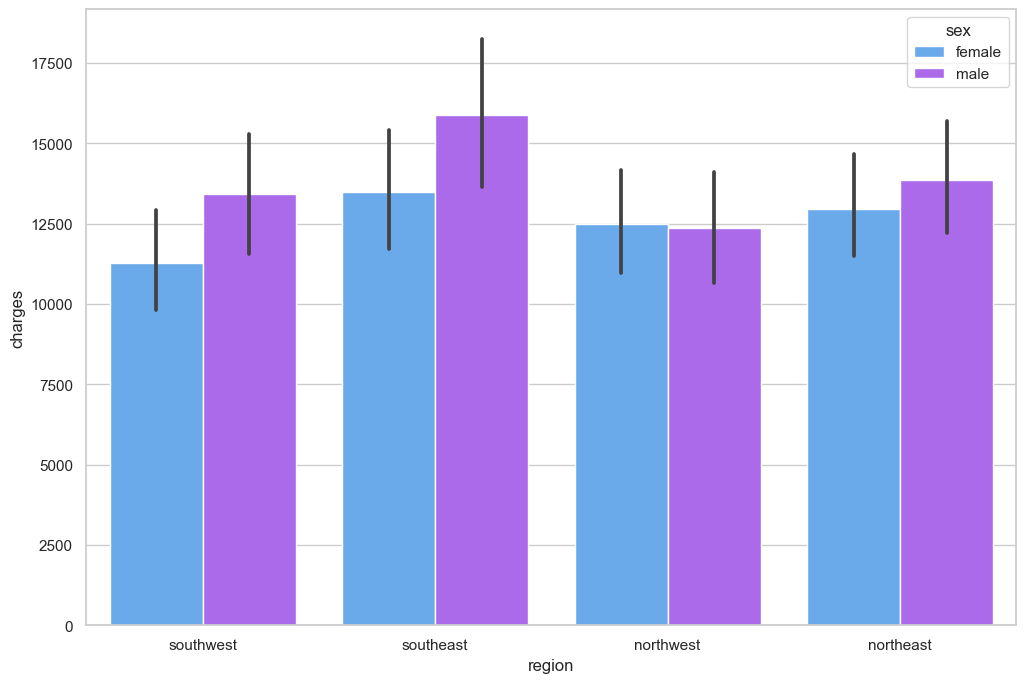

In [30]:
f, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='region',y='charges',hue='sex',data=df,palette='cool')

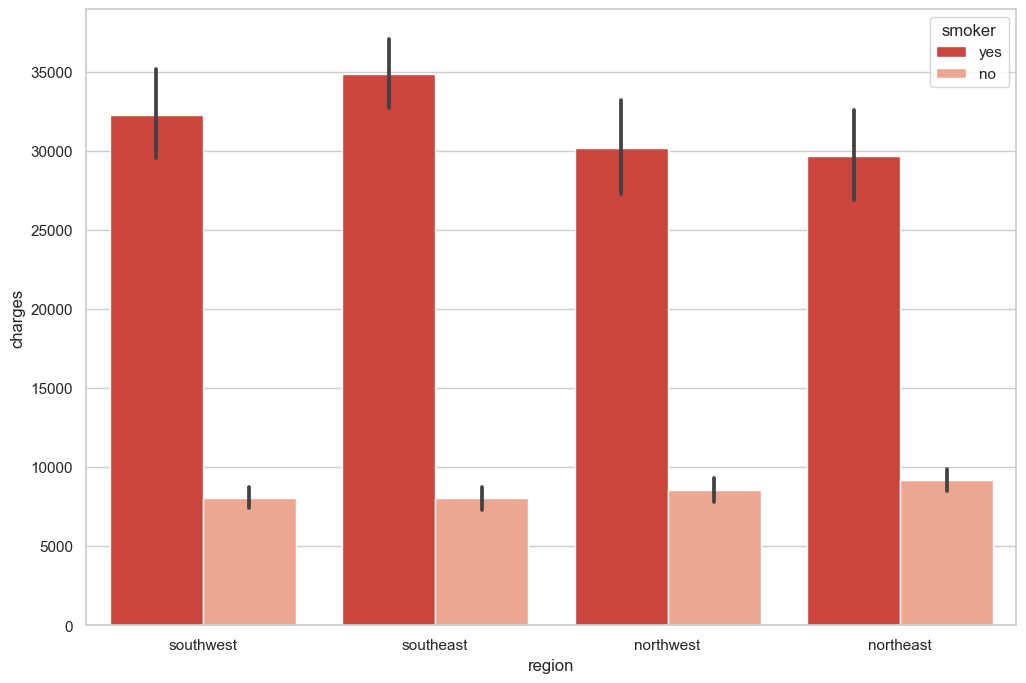

In [31]:
f, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds_r')

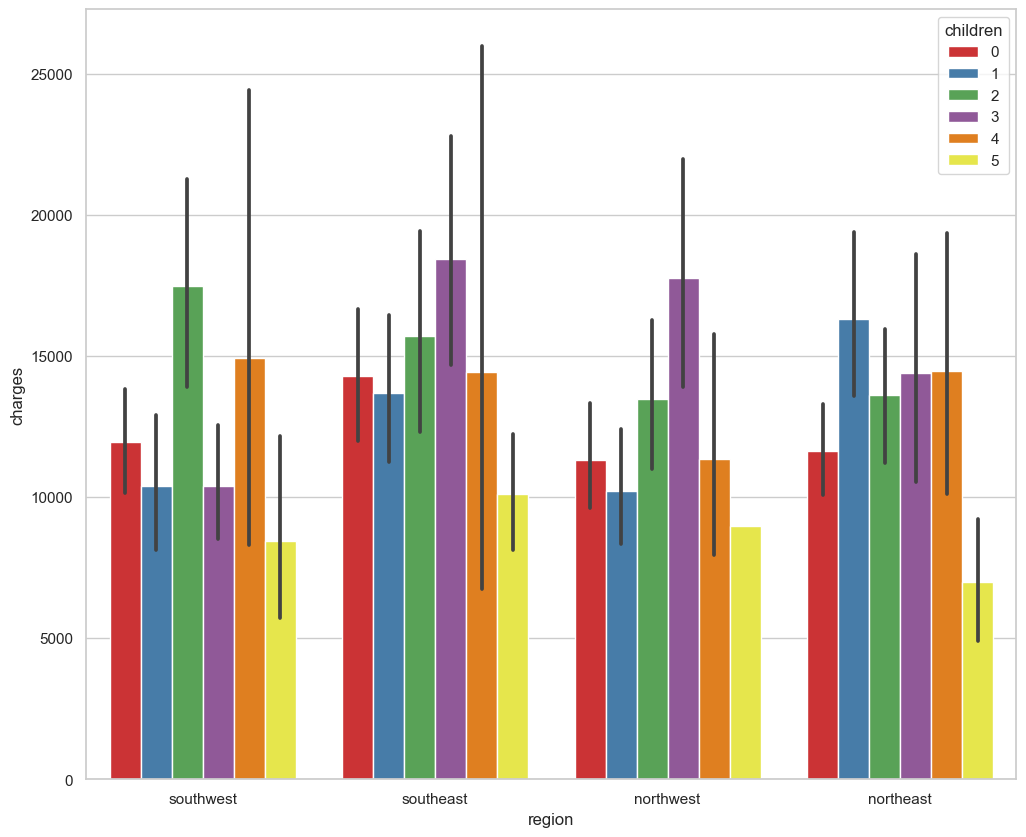

In [32]:
f, ax = plt.subplots(1,1,figsize=(12,10))
ax = sns.barplot(x='region',y='charges',hue='children',data=df,palette='Set1')

Text(0.5, 1.0, 'sex vs charges')

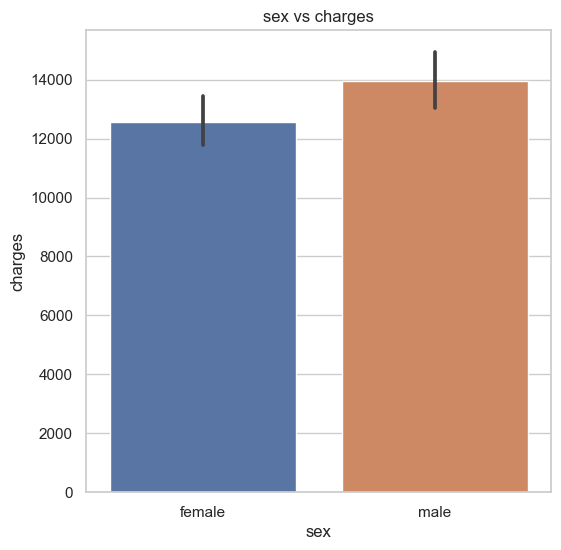

In [33]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'sex', y= 'charges', data = df)
plt.title('sex vs charges')

Text(0.5, 1.0, 'smoker vs charges')

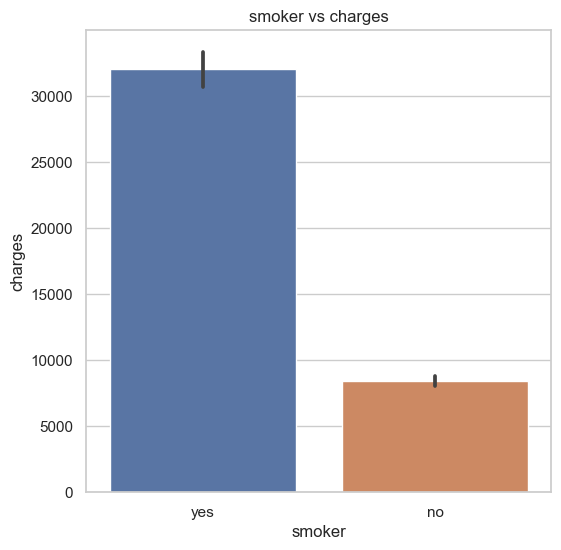

In [34]:
plt.figure(figsize = (6,6))
sns.barplot(x= 'smoker', y = 'charges', data = df)
plt.title('smoker vs charges')

Text(0.5, 1.0, 'BMI VS Charge')

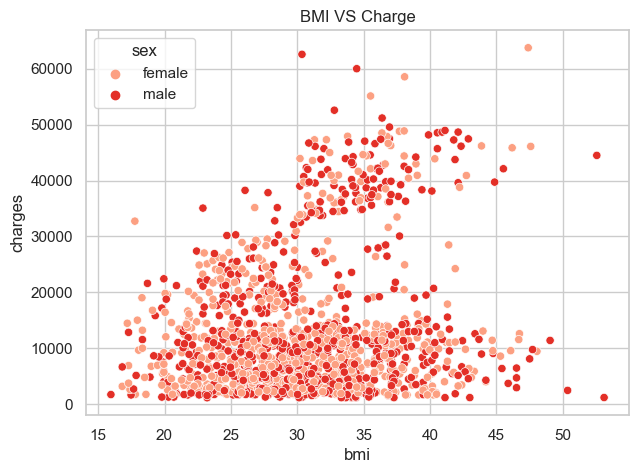

In [35]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

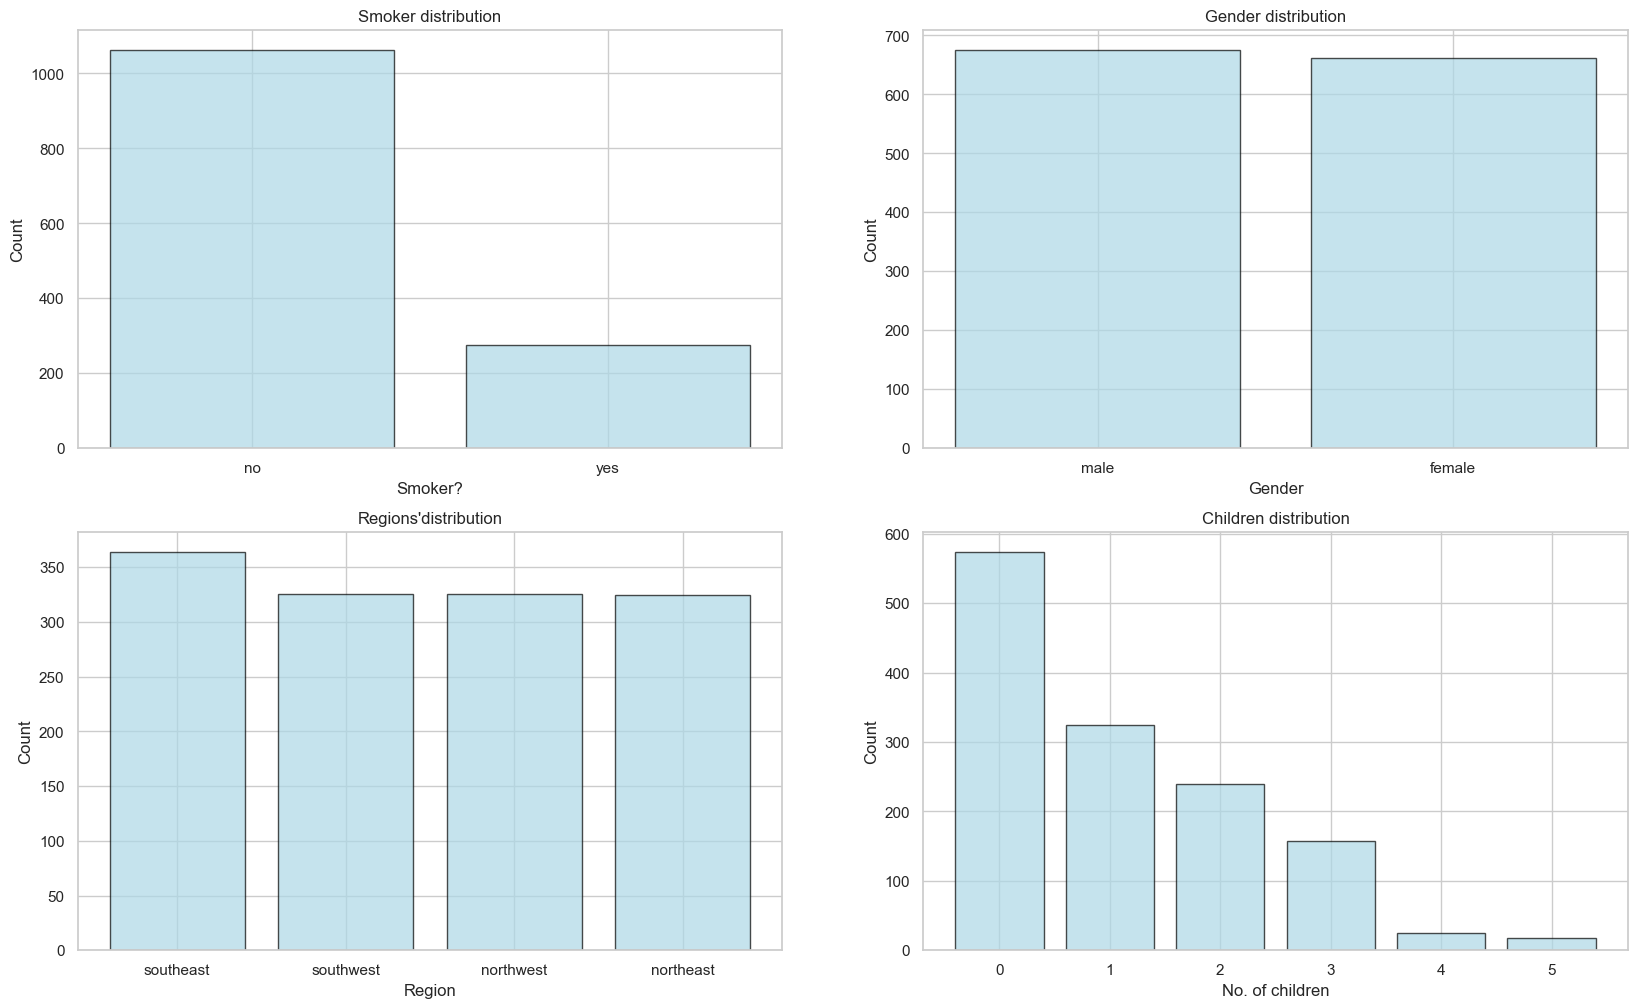

In [41]:
plt.figure(figsize=(20,25))
x=df.smoker.value_counts().index #Values for x-axis
y=[df['smoker'].value_counts()[i] for i in x] # Count of each class on␣,→y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color='lightblue',edgecolor='black',alpha=0.7) #plot a bar chart

plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker distribution')

x1=df.sex.value_counts().index #Values for x-axis
y1=[df['sex'].value_counts()[j] for j in x1] # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color='lightblue',edgecolor='black',alpha=0.7) #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2=df.region.value_counts().index #Values for x-axis
y2=[df['region'].value_counts()[k]for k in x2]# Count of each class on␣,→y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color='lightblue',edgecolor='black',alpha=0.7) #plot a bar chart

plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Regions'distribution")

x3=df.children.value_counts().index #Values for x-axis
y3=[df['children'].value_counts()[l]for l in x3] #Count of each class on␣,→y-axis6

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color='lightblue',edgecolor='black',alpha=0.7) #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count')
plt.title("Children distribution")
plt.show()

C:\Users\sweety Gain\AppData\Local\Temp\ipykernel_15144\3225281487.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.loc[:,['sex','smoker','region']]=df_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)


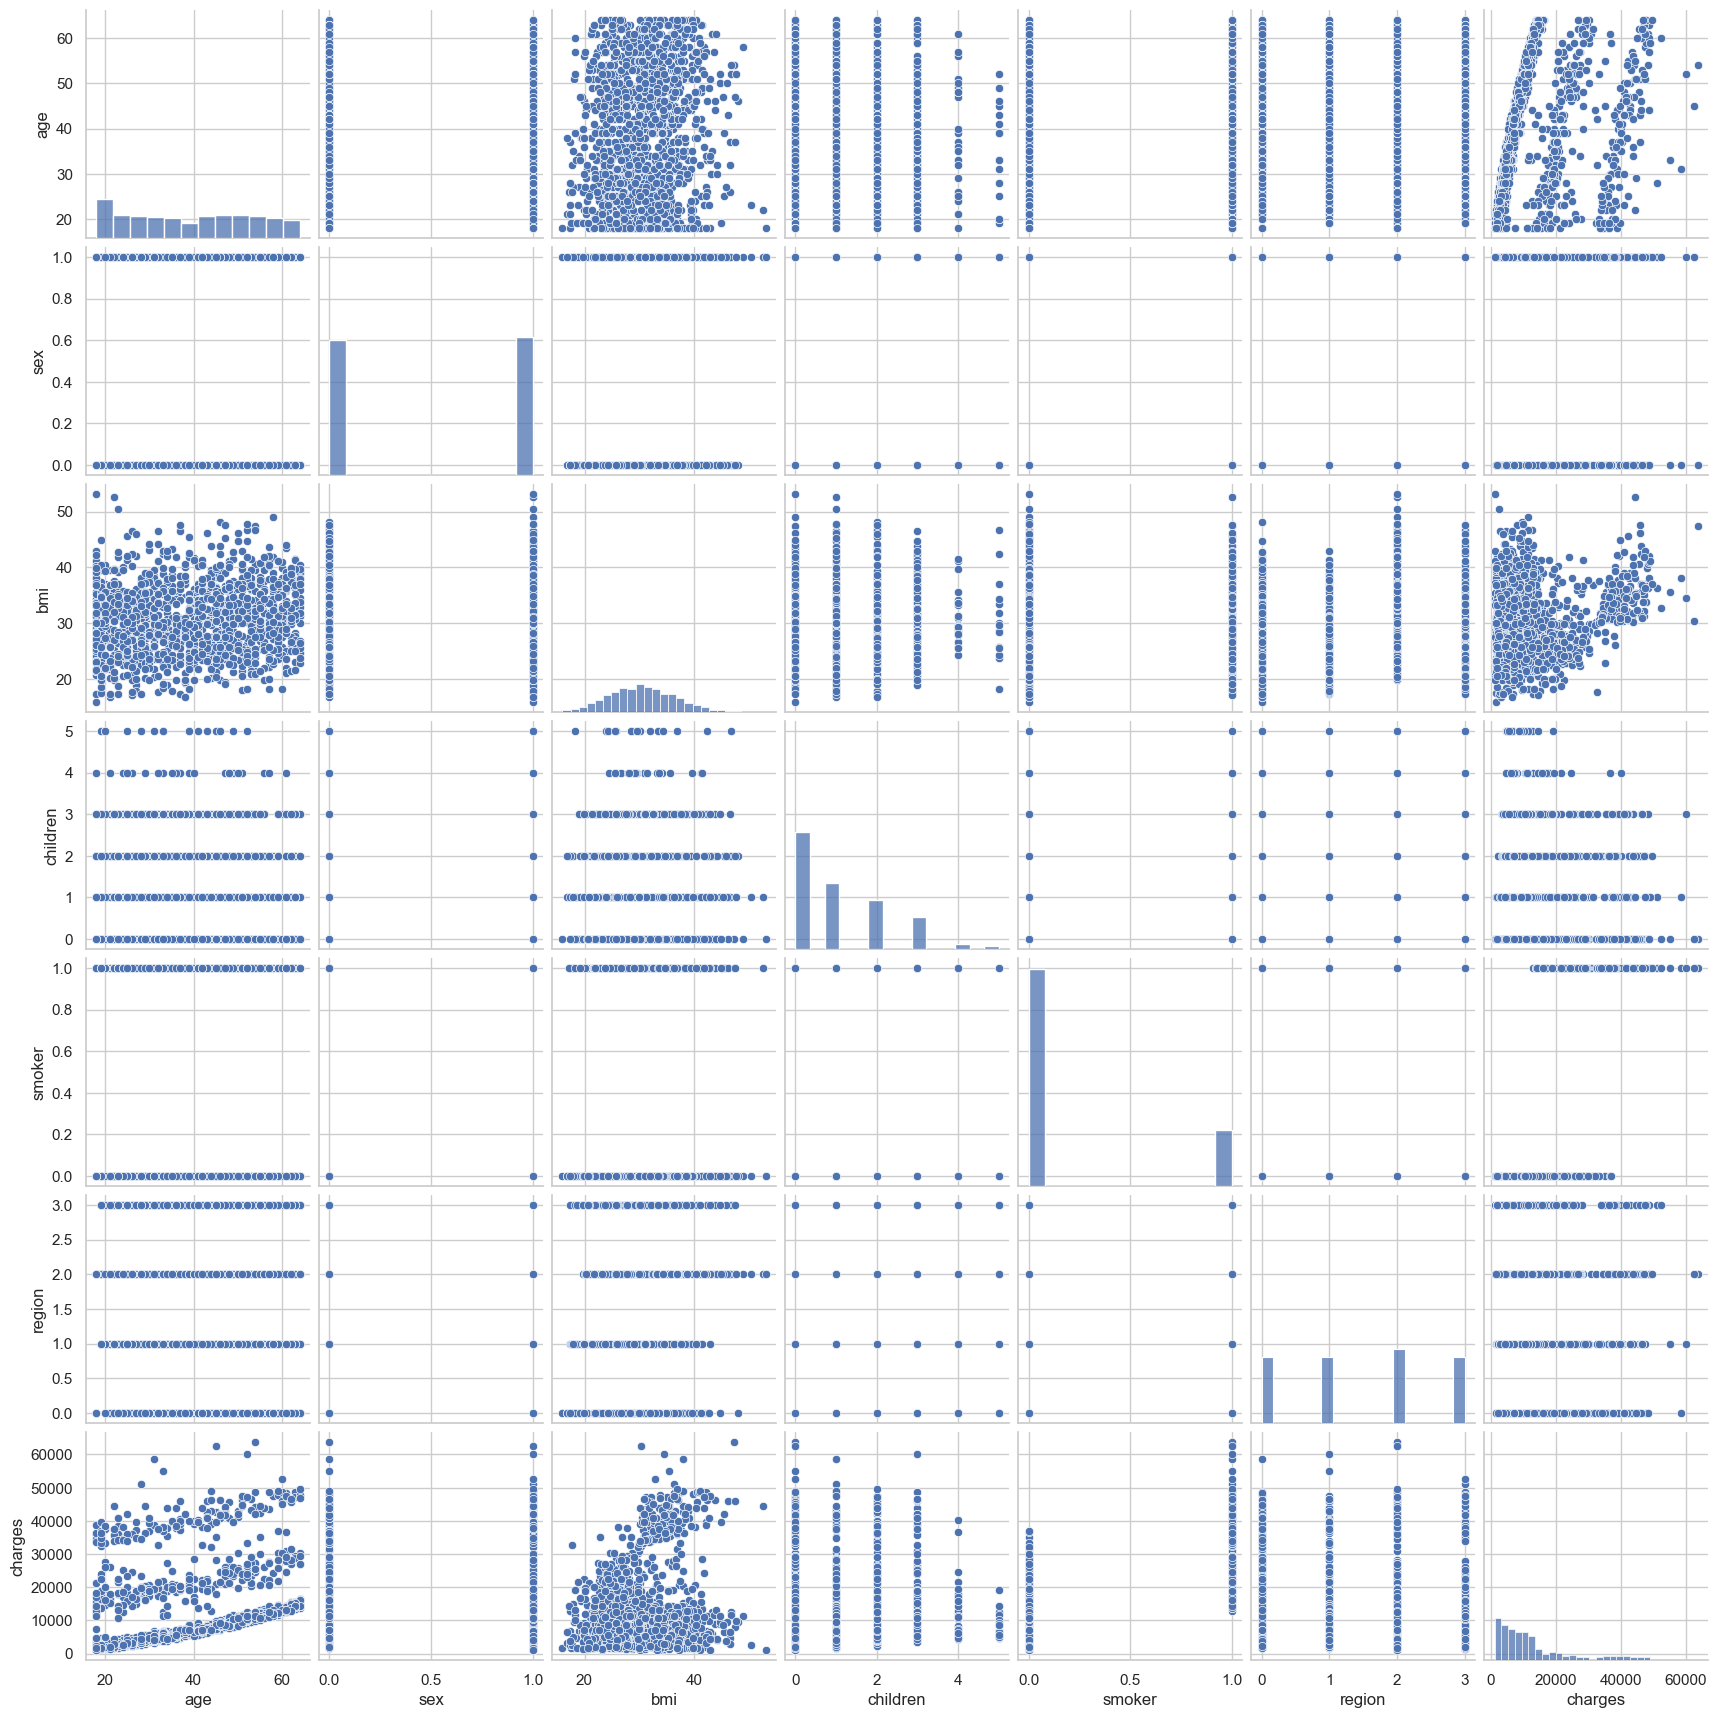

In [42]:
#Label encoding the variables before doing a pairplot because pairplot ignores␣,→strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex','smoker','region']]=df_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)
sns.pairplot(df_encoded) #pairplot
plt.show() # The only obvious correlation of ‘charges’ is with ‘smoker’ Looks like smokers claimed more money than non-smokers- There’s an interesting pattern between ‘age’ and ’charges. Could be because for the same ailment, older people are charged more than the younger ones.

In [ ]:
# Conclusion: non-smokers are charged less than smokers, and the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers. Therefore, conclusion would be that keeping everything
# else constant, bank must charge more premium to smokers than to non-smokers. Moreover, older people must be charged more premium than those who are young.